In [ ]:
#SOURCE
#https://www.kaggle.com/jncharon/python-network-graph/data

In [37]:
import os
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [38]:
import warnings
warnings.filterwarnings('ignore')

G = nx.Graph(day="Stackoverflow")

In [39]:
os.chdir('C:/Users/emrem/OneDrive/Masaüstü/Python/Network_Analysis/')
df_nodes = pd.read_csv('stack_network_nodes.csv')
df_edges = pd.read_csv('stack_network_links.csv')

df_nodes.head(10)
#group renklendirme içindir, nodesize hacmi belirler

,name,group,nodesize
0,html,6,272.45
1,css,6,341.17
2,hibernate,8,29.83
3,spring,8,52.84
4,ruby,3,70.14
5,ruby-on-rails,3,55.31
6,ios,4,87.46
7,swift,4,63.62
8,html5,6,140.18
9,c,1,189.83


In [40]:
df_edges.head(10)
#value iki değişken arasındaki ilişkidir

,source,target,value
0,azure,.net,20.933192
1,sql-server,.net,32.322524
2,asp.net,.net,48.407030
3,entity-framework,.net,24.370903
4,wpf,.net,32.350925
5,linq,.net,20.501744
6,wcf,.net,28.074400
7,c#,.net,62.167895
8,tdd,agile,37.146590
9,codeigniter,ajax,23.191900


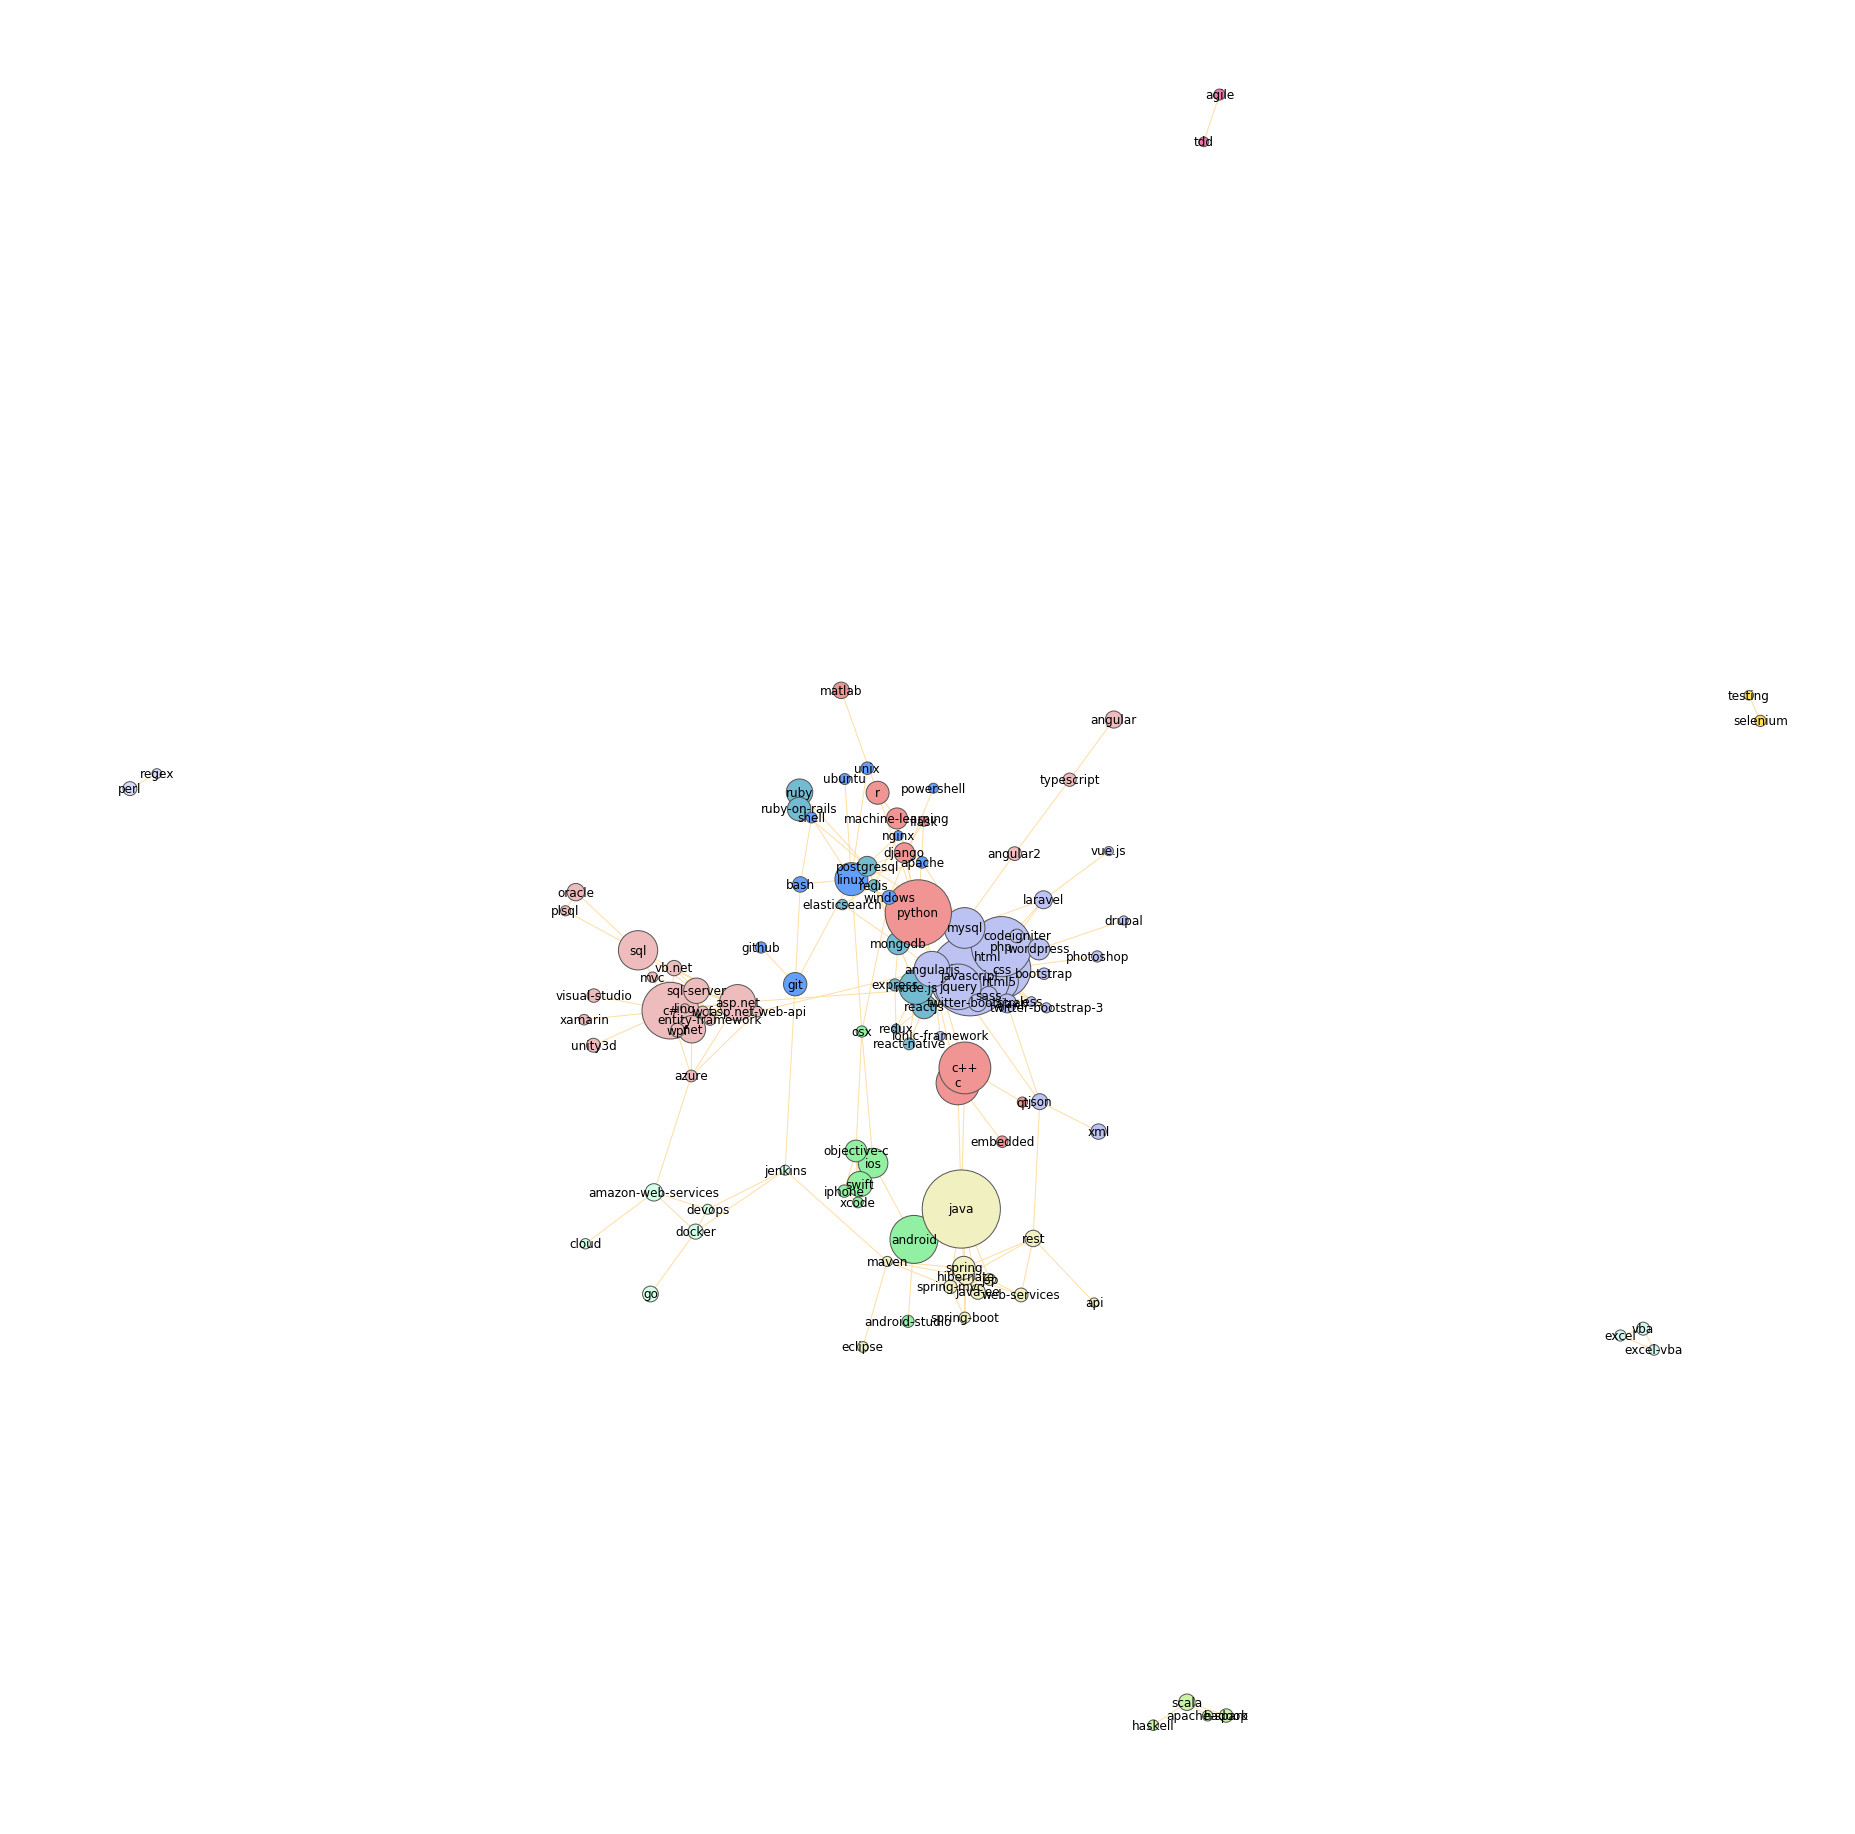

In [42]:
for index, row in df_nodes.iterrows():
    G.add_node(row['name'], group=row['group'], nodesize=row['nodesize'])
    
for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['source'], row['target'], row['value'])])
    
color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}
colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*10 for node in G]

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
nx.draw(G, node_color=colors, node_size=sizes, pos=nx.spring_layout(G, k=0.25, iterations=50), **options)
ax = plt.gca()
ax.collections[0].set_edgecolor("#555555") 
plt.show()